# Lab 4

### Setup

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Open file, read data, close file

In [ ]:
# Open the 100 training samples in read mode and read lines from file into memory
file = open("datasources\mnist_train_100.csv", "r")
data = file.readlines()

# Close the file
file.close()

One line == one sample. First item is label. Items are comma separated.

In [ ]:
# Take the first line splitting based on commas
values = data[0].split(",")

# Take the list of pixels (exclude label at values[0]), and reshape to a 2D float array of pixels
image = np.asfarray(values[1:]).reshape((28, 28))

Plot 2D array as image. 

In [ ]:
# Plot this 2D array as an image, use the grey colour map and don’t interpolate
plt.imshow(image, cmap='Greys', interpolation='None')
plt.show()

### Training

In [ ]:
from lab3.nn_general import NeuralNetwork

Open file, read data, close file

In [ ]:
# Load the MNIST 100 training samples CSV file into a list
file = open("datasources\mnist_train_100.csv", 'r')
data = file.readlines()
file.close()
print("Length of trainin dataset: ", len(data))

Create a NN, with 28*28 input nodes, 100 hidden nodes, 10 output nodes

In [ ]:
nn = NeuralNetwork(784, 100, 10, 0.3)

Train the nn for each training sample

In [ ]:
# Train the neural network on each trainingsample
for record in data:
    
    # Split the record by the commas
    pixelValues = record.split(',')
    label = pixelValues.pop(0)
    
    # Scale and shift the inputs from 0..255 to 0.01..1
    inputs = (np.asfarray(pixelValues) / 255.0 * 0.99) + 0.01
    
    # Create the target output values (all 0.01, except the desired label which is 0.99)
    targets = np.zeros(nn.output_nodes) + 0.01
    
    # pixelValues[0] is the target label for this record
    targets[int(label)] = 0.99
    
    # Train the network
    nn.train(inputs.tolist(), targets.tolist())

### Testing

In [ ]:
# Load the MNIST test samples CSV file into a list
file = open("datasources\mnist_test_10.csv", 'r')
data = file.readlines()
file.close()

Create new scorecard

In [ ]:
scorecard = []

For each record in training data, query nn and compare label prediction against correct result/ label.

In [ ]:
for record in data:
    # Split the record by commas
    pixelValues = record.split(',')
    
    # Correct label is the first value
    correct_label = int(pixelValues.pop(0))
    print("Correct label: ", correct_label)
    
    # Scale and shift the inputs
    inputs = (np.asfarray(pixelValues)/255.0*0.99) + 0.01
    
    # Query the network
    outputs = nn.queryNN(inputs.tolist())
    
    # Identify predicted label
    prediction = np.argmax(outputs)
    print("Prediction: ", prediction, '\n')
    
    # Add to scorecard
    if prediction == correct_label:
        scorecard.append(1)
    else:
        scorecard.append(0)
        # Take the list of pixels, and reshape to a 2D float array of pixels
        image = np.asfarray(pixelValues).reshape((28, 28))
        
        # Plot this 2D array as an image, use the grey colour map and don’t interpolate
        plt.imshow(image, cmap='Greys', interpolation='None')
        plt.show()

Calculate performance...

In [ ]:
scorecard = np.asarray(scorecard)
print("Success rate: ", (scorecard.sum()/scorecard.size)*100, '%')

---

### Attempt to improve performance

In [ ]:
from lab3.nn_general import NeuralNetwork
import numpy as np

Define functions

In [5]:
def train(data, nn):
    # Train the neural network on each trainingsample
    for record in data:

        # Split the record by the commas
        pixelValues = record.split(',')
        label = pixelValues.pop(0)

        # Scale and shift the inputs from 0..255 to 0.01..1
        inputs = (np.asfarray(pixelValues) / 255.0 * 0.99) + 0.01

        # Create the target output values (all 0.01, except the desired label which is 0.99)
        targets = np.zeros(nn.output_nodes) + 0.01

        # pixelValues[0] is the target label for this record
        targets[int(label)] = 0.99

        # Train the network
        nn.train(inputs.tolist(), targets.tolist())
        
    return nn

In [6]:
def test(data, nn):
    
    scorecard = []
    successRate = 0
    
    for record in data:
        # Split the record by commas
        pixelValues = record.split(',')

        # Correct label is the first value
        correct_label = int(pixelValues.pop(0))

        # Scale and shift the inputs
        inputs = (np.asfarray(pixelValues)/255.0*0.99) + 0.01

        # Query the network
        outputs = nn.queryNN(inputs.tolist())

        # Identify predicted label
        prediction = np.argmax(outputs)

        # Add to scorecard
        if prediction == correct_label:
            scorecard.append(1)
        else:
            scorecard.append(0)
            
    scorecard = np.asarray(scorecard)
    successRate = (scorecard.sum()/scorecard.size)*100
    return nn, successRate

Get training data

In [ ]:
file = open("datasources\mnist_train_100.csv", 'r')
data_training = file.readlines()
file.close()

Get test data

In [ ]:
file = open("datasources\mnist_test_10.csv", 'r')
data_testing = file.readlines()
file.close()

Specify nn parameters to use

In [ ]:
x_hidden_nodes = [50, 75, 100, 200, 300, 500, 700, 900, 1100]
lrs = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

Create dict to store results

In [ ]:
results = {}

In [ ]:
for hidden_nodes in x_hidden_nodes:
    for lr in lrs:
        nn = NeuralNetwork(input_nodes=784, 
                           hidden_nodes=hidden_nodes, 
                           output_nodes=10, 
                           lr=lr)
        for i in range(10):
            nn = train(data_training, nn)
        nn, successRate = test(data_testing, nn)
        
        results[str(hidden_nodes)+';'+str(lr)] = successRate

In [ ]:
results

In [ ]:
bestResult = max(results, key=lambda y: abs(results[y]))
print("Best result of {}% achieved with...\nnumber of hidden nodes: {}\nlearning rate: {}".format(
    results[bestResult], 
    bestResult.split(';')[0], 
    bestResult.split(';')[1]))

---

## Training with len(500) training dataset

In [8]:
from lab3.nn_general import NeuralNetwork
import numpy as np
from tqdm import tqdm

Get training data

In [1]:
file = open("datasources\mnist_train_500.csv", 'r')
data_training = file.readlines()
file.close()

Get test data

In [2]:
file = open("datasources\mnist_test_100.csv", 'r')
data_testing = file.readlines()
file.close()

Specify nn parameters to use

In [4]:
x_hidden_nodes = [50, 75, 100, 200, 300, 500, 700, 900, 1100]
lrs = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

Create dict to store results

In [7]:
results = {}

In [10]:
for hidden_nodes in tqdm(x_hidden_nodes):
    for lr in lrs:
        nn = NeuralNetwork(input_nodes=784, 
                           hidden_nodes=hidden_nodes, 
                           output_nodes=10, 
                           lr=lr)
        for i in range(10):
            nn = train(data_training, nn)
        nn, successRate = test(data_testing, nn)
        
        results[str(hidden_nodes)+';'+str(lr)] = successRate

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [19:51<00:00, 132.40s/it]


In [11]:
results

{'50;0.2': 88.0,
 '50;0.3': 86.0,
 '50;0.4': 88.0,
 '50;0.5': 93.0,
 '50;0.6': 87.0,
 '50;0.7': 90.0,
 '50;0.8': 84.0,
 '50;0.9': 89.0,
 '75;0.2': 90.0,
 '75;0.3': 91.0,
 '75;0.4': 90.0,
 '75;0.5': 91.0,
 '75;0.6': 92.0,
 '75;0.7': 90.0,
 '75;0.8': 88.0,
 '75;0.9': 91.0,
 '100;0.2': 87.0,
 '100;0.3': 90.0,
 '100;0.4': 89.0,
 '100;0.5': 92.0,
 '100;0.6': 91.0,
 '100;0.7': 90.0,
 '100;0.8': 89.0,
 '100;0.9': 84.0,
 '200;0.2': 88.0,
 '200;0.3': 89.0,
 '200;0.4': 93.0,
 '200;0.5': 93.0,
 '200;0.6': 89.0,
 '200;0.7': 93.0,
 '200;0.8': 91.0,
 '200;0.9': 90.0,
 '300;0.2': 87.0,
 '300;0.3': 88.0,
 '300;0.4': 90.0,
 '300;0.5': 88.0,
 '300;0.6': 90.0,
 '300;0.7': 91.0,
 '300;0.8': 94.0,
 '300;0.9': 87.0,
 '500;0.2': 91.0,
 '500;0.3': 93.0,
 '500;0.4': 90.0,
 '500;0.5': 87.0,
 '500;0.6': 89.0,
 '500;0.7': 93.0,
 '500;0.8': 89.0,
 '500;0.9': 87.0,
 '700;0.2': 85.0,
 '700;0.3': 87.0,
 '700;0.4': 87.0,
 '700;0.5': 88.0,
 '700;0.6': 88.0,
 '700;0.7': 86.0,
 '700;0.8': 87.0,
 '700;0.9': 86.0,
 '900;0.

In [12]:
bestResult = max(results, key=lambda y: abs(results[y]))
print("Best result of {}% achieved with...\nnumber of hidden nodes: {}\nlearning rate: {}".format(
    results[bestResult],
    bestResult.split(';')[0], 
    bestResult.split(';')[1]))

Best result of 94.0% achieved with...
number of hidden nodes: 300
learning rate: 0.8


In [13]:
import matplotlib.pyplot as plt

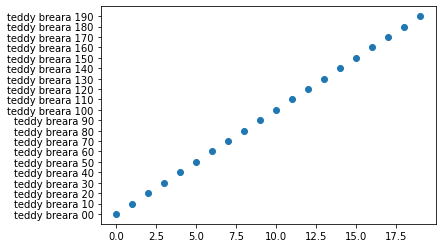

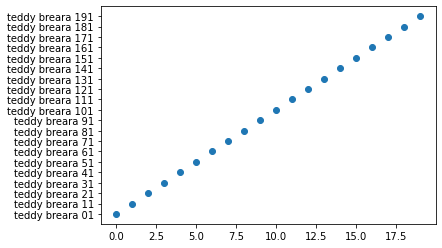

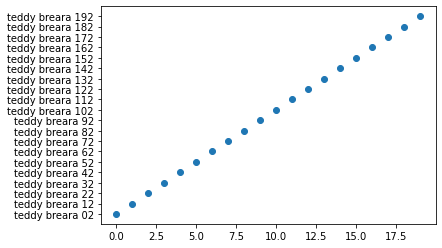

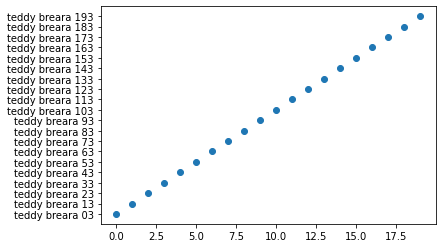

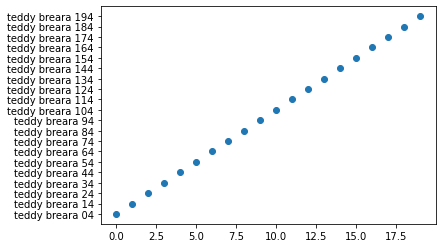

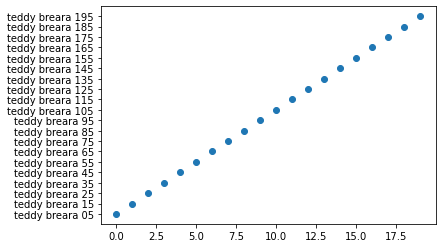

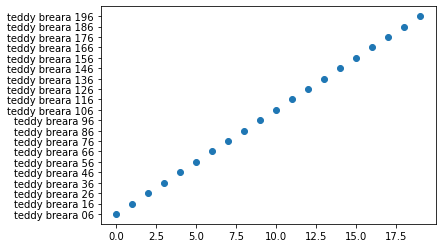

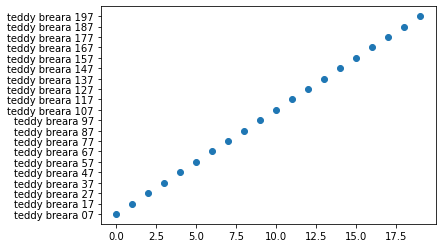

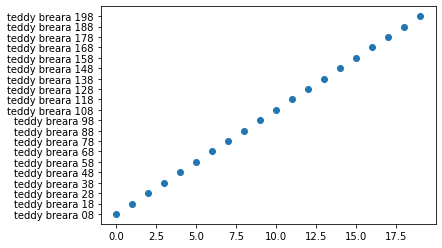

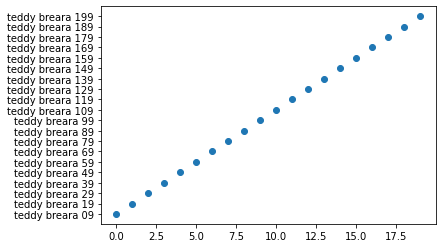

In [30]:
fig = plt.figure()
ax1 = fig.add_subplot()

for hid in newDict.keys():
    xValues = newDict[hid].keys()
    yValues = newDict[hid].values()
    plt.scatter(xValues, yValues)
    plt.show()

---

### (DON'T!) Use with full datasets

Import tqdm to have progress bar

In [ ]:
from tqdm import tqdm
import numpy as np
from lab3.nn_general import NeuralNetwork

Set necessary parameters

In [ ]:
x_hidden_nodes = [50, 75, 100, 200, 300, 500, 700, 900, 1100]
lrs = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

Get full training data

In [ ]:
file = open("datasources\mnist_train.csv", 'r')
data_training_full = file.readlines()
file.close()

Get full test data

In [ ]:
file = open("datasources\mnist_test.csv", 'r')
data_testing_full = file.readlines()
file.close()

In [ ]:
resultsFull = {}

In [2]:
assert False

AssertionError: 

don't run the below as it takes too long...

In [ ]:
for hidden_nodes in tqdm(x_hidden_nodes):
    for lr in lrs:
        nnFull = NeuralNetwork(input_nodes=784, 
                               hidden_nodes=hidden_nodes, 
                               output_nodes=10, 
                               lr=lr)
        nnFull = train(data_training_full, nnFull)
        nnFull, successRate = test(data_testing_full, nnFull)
        
        resultsFull[str(hidden_nodes)+';'+str(lr)] = successRate

In [ ]:
resultsFull

In [ ]:
bestResultFull = max(resultsFull, key=lambda y: abs(resultsFull[y]))
print("Best result of {}% achieved for full datasets with...\nnumber of hidden nodes: {}\nlearning rate: {}".format(
    resultsFull[bestResultFull], 
    bestResultFull.split(';')[0], 
    bestResultFull.split(';')[1]))